In [537]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [538]:
df = pd.read_csv('insurance_data.csv')
df.head()


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


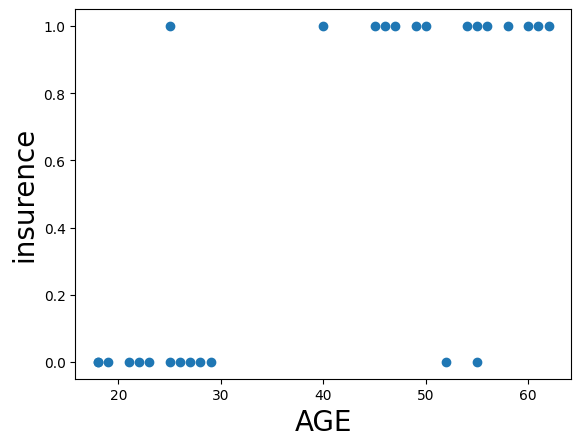

In [539]:

plt.xlabel('AGE',fontsize=20)
plt.ylabel('insurence',fontsize=20)
plt.scatter(df[['age']],df.bought_insurance)

In [540]:
from sklearn.model_selection import train_test_split

In [541]:
X_train,X_test,y_train,y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.2,random_state=10)

In [542]:
len(X_train)

21

In [543]:
X_test

,age
7,60
5,56
18,19
21,26
11,28
1,25


In [544]:
from sklearn.linear_model import LogisticRegression
reg =LogisticRegression()

In [545]:
reg.fit(X_train,y_train)

LogisticRegression()

In [546]:
reg.predict(X_test)

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [547]:
reg.predict_proba(X_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

In [548]:
                                     #------------------  ANOTHER EXAMPLE --------------------------- 

In [549]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [550]:
de = pd.read_csv('company_employ_logis.csv')
de.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [551]:
left =de[de.left ==1]
left.shape  

(3571, 10)

In [552]:
retained =de[de.left ==0]
retained.shape 

(11428, 10)

In [553]:
# de.groupby('left').mean() 

<Axes: xlabel='salary'>

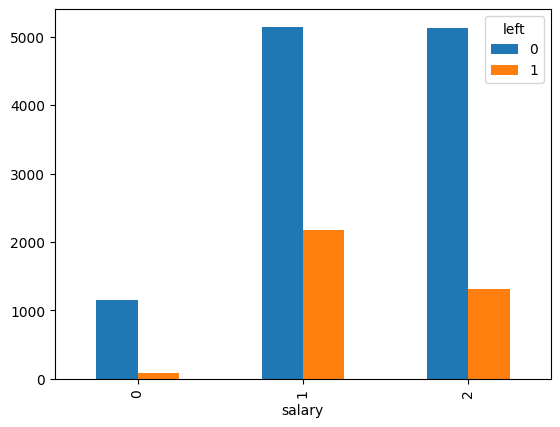

In [571]:
pd.crosstab(de.salary,de.left).plot(kind='bar')

<Axes: xlabel='Department'>

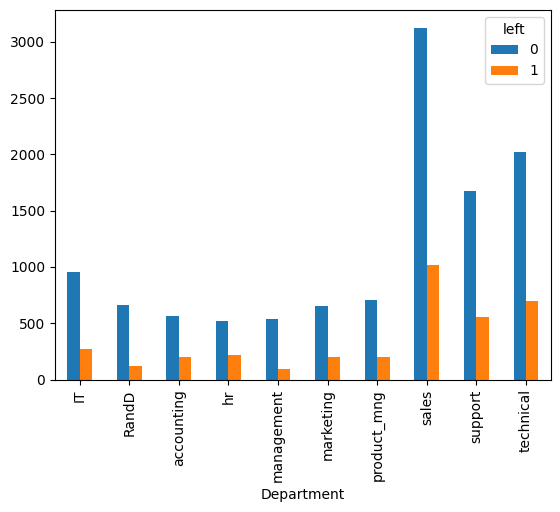

In [555]:
pd.crosstab(de.Department,de.left).plot(kind='bar')

In [556]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [557]:
de.salary = le.fit_transform(de.salary)
de.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [558]:
new_column = de[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new_column.head() 

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1


In [559]:
from sklearn.model_selection import train_test_split

In [560]:
A = new_column.drop('salary',axis='columns')
A.head()

,satisfaction_level,average_montly_hours,promotion_last_5years
0,0.38,157,0
1,0.80,262,0
2,0.11,272,0
3,0.72,223,0
4,0.37,159,0


In [561]:
b = de.salary

In [562]:
A_train,A_test,b_train,b_test = train_test_split(A,b,test_size=0.2,random_state=10)

In [563]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [564]:
A_test

,satisfaction_level,average_montly_hours,promotion_last_5years
13982,0.65,125,0
822,0.41,128,0
13751,0.44,125,0
9656,0.93,190,0
13497,0.76,170,0
...,...,...,...
3876,0.54,183,0
11504,0.70,150,0
2435,0.21,130,0
5161,0.85,142,0


In [565]:
model.fit(A_train,b_train)

LogisticRegression()

In [566]:
model.predict(A_test)

array([1, 1, 1, ..., 1, 1, 1])

In [567]:
model.score(A_test,b_test)

0.49033333333333334